<span style="color: blue; font-size: 20px; font-weight: bold;">Комментарий ревьюера</span>

<span style="color: blue">Привет, Женя! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</span>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<span style="color: blue">Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</span>


---


<span style="color: blue">синий текст - просто текст комментария</span>

<span style="color: green">✔️ и зеленый текст - все отлично</span>

<span style="color: orange">⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</span>

<span style="color: red">❌ и красный текст - есть недочеты</span>


</details>    
</br>
<span style="color: blue">Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное.</span>

<span style="color: blue">Ответы на мои комментарии лучше тоже помечать.<br>
Например: </span><br><span style="color: purple; font-weight: bold">Комментарий студента</span>

<span style="color: blue; font-weight: bold;">Давай смотреть, что получилось!</span>

<span style="color: blue; font-size: 18px; font-weight: bold;">Комментарий ревьюера 2</span>

<span style="color: blue">Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</span> 

In [1]:
!pip install shap
!pip install scikit-learn==1.1.3
!pip install phik

     |████████████████████████████████| 539 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 30.8 MB 98 kB/s  eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


## Проект: Обучение с учителем: качество модели

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span>  ❌\
<span style="color: red"> Проект у нас несколко другой 🤷</span>

***Описание проекта***

    HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
    
    Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
    
    Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 
    
    У вас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
    
    Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.
    Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

In [2]:
import numpy as np
import warnings

import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from phik import phik_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    RobustScaler,
    MinMaxScaler,
    LabelEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVR, SVC

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [3]:
warnings.filterwarnings('ignore')

In [4]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

## Задача 1: предсказание уровня удовлетворённости сотрудника

## Загрузка и описание данных

In [5]:
def read_file(try_file, except_file, sep):
    try:
        try:
            data_file = pd.read_csv(try_file, sep=sep)
        except:
            data_file = pd.read_csv(try_file)
    except:
        try:
            data_file = pd.read_csv(except_file, sep=sep)
        except:
            data_file = pd.read_csv(except_file)
    return data_file

train_job_satisfaction_rate = read_file('/datasets/train_job_satisfaction_rate.csv', 
                                        'https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv', '')

test_features = read_file('/datasets/test_features.csv', 'https://code.s3.yandex.net/datasets/test_features.csv', '')
test_target_job_satisfaction_rate = read_file('/datasets/test_target_job_satisfaction_rate.csv', 
                                              'https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv', '')

In [6]:
def df_info(df) -> pd.DataFrame:
    information = df.info()
    return information

df_info(train_job_satisfaction_rate)
df_info(test_features)
df_info(test_target_job_satisfaction_rate)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Метод info выведет информацию и без display, display, в данном случае, печатает только слово None в аутпутах.
</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [7]:
def df_describe(df) -> pd.DataFrame:
    disp = display(df.describe())
    return disp

df_describe(train_job_satisfaction_rate)
df_describe(test_features)
df_describe(test_target_job_satisfaction_rate)

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


In [8]:
def df_nan(df) -> pd.DataFrame:
    nans = display(df.isna().sum())
    return nans

df_nan(train_job_satisfaction_rate)
df_nan(test_features)
df_nan(test_target_job_satisfaction_rate)

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

id                       0
job_satisfaction_rate    0
dtype: int64

In [9]:
def df_duplicated(df) -> pd.DataFrame:
    duplicates = print(df.duplicated().sum())
    return duplicates

df_duplicated(train_job_satisfaction_rate)
df_duplicated(test_features)
df_duplicated(test_target_job_satisfaction_rate)

0
0
0


***train_job_satisfaction_rate.csv*** - таблица, которая содержит тренировочные данные для обучения модели.
    
    dept — отдел, в котором работает сотрудник.
    
    level — уровень занимаемой должности.
    
    workload — уровень загруженности сотрудника.
    
    employment_years — длительность работы в компании (в годах).
    
    last_year_promo — показывает, было ли повышение за последний год.
    
    last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год.
    
    supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель.
    
    salary — ежемесячная зарплата сотрудника.
    
    job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.
    

***test_features.csv*** - таблица, которая содержит входные признаки тестовой выборки, данные в таблице такие же, кроме
job_satisfaction_rate

***test_target_job_satisfaction_rate.csv*** - таблица, которая содержит целевой признак тестовой выборки, в ней находится 
job_satisfaction_rate

Данные были изучены, пропуски будут заполнены в пайплайне, дубликаты удалены

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Здесь заканчивается структурный блок работы - стоит сделать промежуточные выводы о проделанной работе в блоке.~~</font>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Решил объединить загрузку и описание данных и написал вывод в конце
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

## Предобработка данных

In [10]:
train_job_satisfaction_rate['level'] = train_job_satisfaction_rate['level'].replace('sinior', 'senior')
test_features['level'] = test_features['level'].replace('sinior', 'senior')

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>  ~~Здорово, что отмечено новое значение в категориях, но такие значения нужно обработать в Пайплайн, инструментами Энкодеров.~~</font>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Обработал
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [11]:
train_job_satisfaction_rate = train_job_satisfaction_rate.drop_duplicates()
# test_features = test_features.drop_duplicates()
test_target_job_satisfaction_rate = test_target_job_satisfaction_rate.drop_duplicates()

df_duplicated(train_job_satisfaction_rate)
df_duplicated(test_features)
df_duplicated(test_target_job_satisfaction_rate)

0
0
0


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Тестовую выборку нельзя фильтровать. Это лишает её репрезентативности.\
Эти данные не учавствуют в обучении и на могут ухудшать модель.~~</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ⚠️\
<span style="color: darkorange"> Из тестовых данных дубликаты не удаляем. </span>

Исправил опечатку в столбцах, заменил пустые строки на пропуски и установил столбец **'id'** как индекс

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

## Исследовательский анализ

### Тренировочные данные

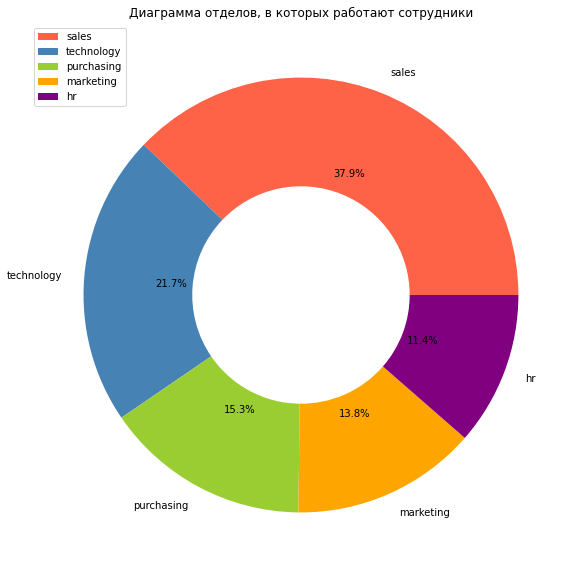

In [12]:
train_job_satisfaction_rate['dept'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма отделов, в которых работают сотрудники',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32', '#FFA500', '#800080']);

plt.legend()
plt.show()

Больше всего людей работает в продажах(36.5%), меньше всего в сфере управления персоналом(11.7%)

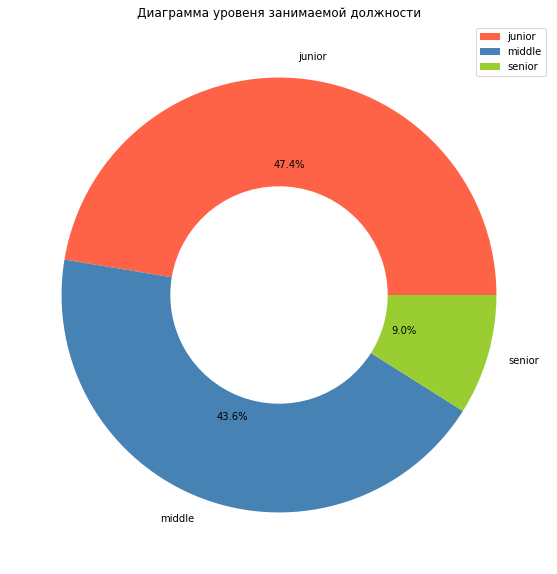

In [13]:
train_job_satisfaction_rate['level'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма уровеня занимаемой должности',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32']);

plt.legend()
plt.show()

Больше всего джуниоров(45.3%) и мидлов(45.2%) меньше всего сеньоров(9.5%)

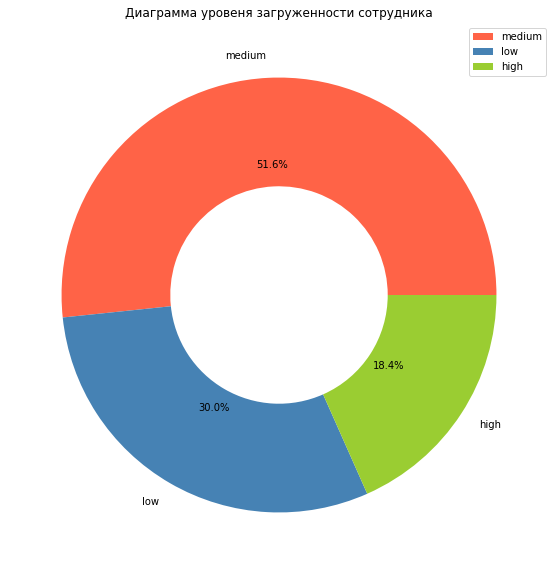

In [14]:
train_job_satisfaction_rate['workload'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма уровеня загруженности сотрудника',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32']);

plt.legend()
plt.show()

Чаще всего у сотрудников средняя загруженность на работе(50.8%), меньше всего высокая(19.2%)

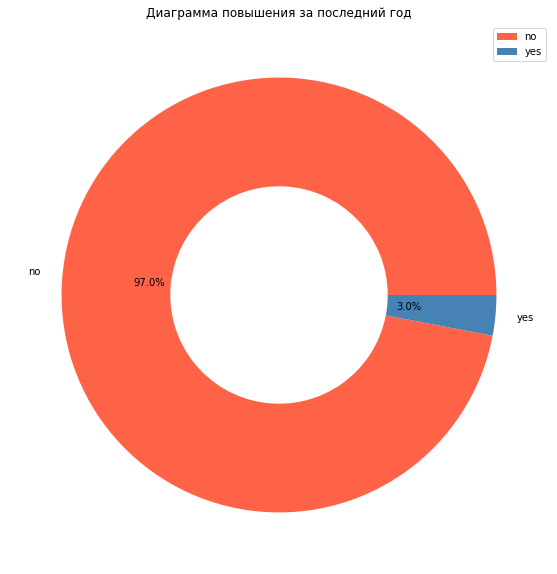

In [15]:
train_job_satisfaction_rate['last_year_promo'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма повышения за последний год',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4']);

plt.legend()
plt.show()

В компании очень мало повышений за последний год, всего 3.2% сотрудников повысились

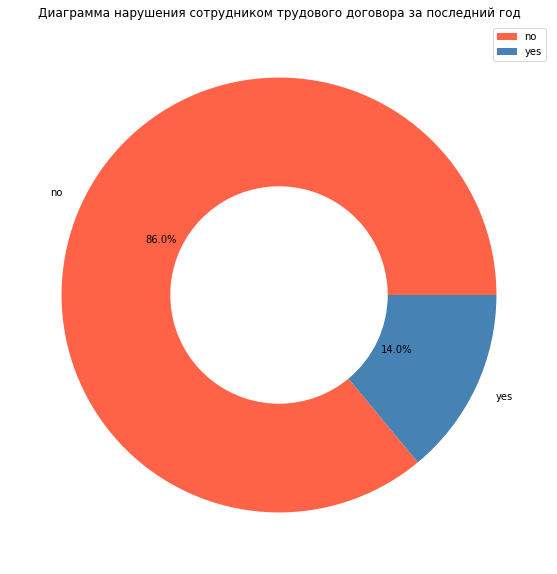

In [16]:
train_job_satisfaction_rate['last_year_violations'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма нарушения сотрудником трудового договора за последний год',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4']);

plt.legend()
plt.show()

Сотрудники редко нарушают условия договора, 85.3% не нарушали

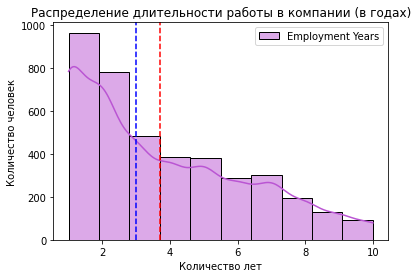

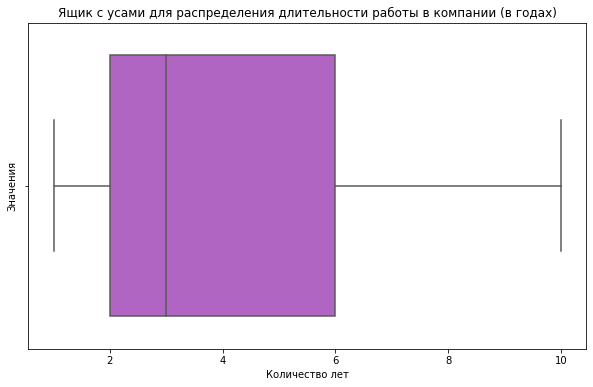

In [17]:
sns.histplot(
    data=train_job_satisfaction_rate,
    x='employment_years',
    kde=True,
    color='#BA55D3',
    bins=10,
    label='Employment Years'
)

plt.title('Распределение длительности работы в компании (в годах)')
plt.xlabel('Количество лет')
plt.ylabel('Количество человек')
plt.legend()

plt.axvline(x=train_job_satisfaction_rate['employment_years'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=train_job_satisfaction_rate['employment_years'].median(), color='blue', linestyle='--', label='Median Value')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='employment_years', 
            data=train_job_satisfaction_rate, 
            ax=ax, 
            palette=['#BA55D3'],
            flierprops={'marker': 
                        'o', 
                        'markersize': 10, 
                        'markerfacecolor': 'blue', 
                        'markeredgecolor': 'black'})
plt.title('Ящик с усами для распределения длительности работы в компании (в годах)')
plt.xlabel('Количество лет')
plt.ylabel('Значения')
plt.show()

Распределение длительности работы в компании (в годах) варьируется от 1 до 10, больше всего в компании сотрудников, которые работают первый год или два, распределение ассиметричное вправо

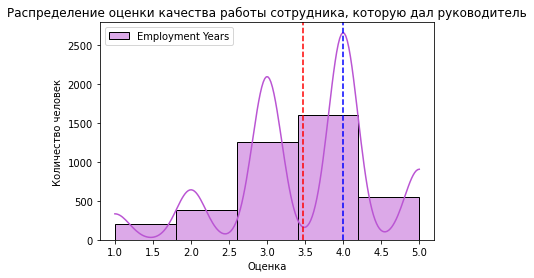

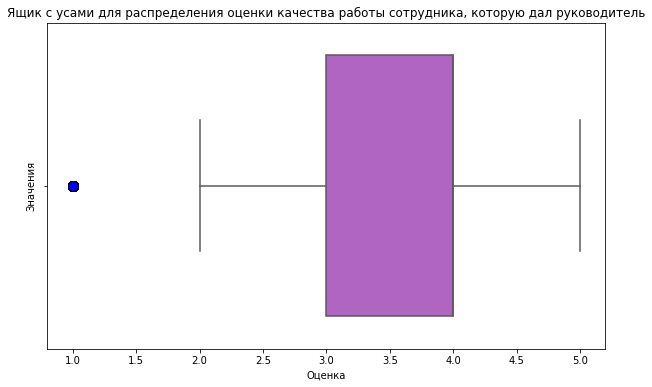

In [18]:
sns.histplot(
    data=train_job_satisfaction_rate,
    x='supervisor_evaluation',
    kde=True,
    color='#BA55D3',
    bins=5,
    label='Employment Years'
)

plt.title('Распределение оценки качества работы сотрудника, которую дал руководитель')
plt.xlabel('Оценка')
plt.ylabel('Количество человек')
plt.legend()

plt.axvline(x=train_job_satisfaction_rate['supervisor_evaluation'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=train_job_satisfaction_rate['supervisor_evaluation'].median(), color='blue', linestyle='--', label='Median Value')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='supervisor_evaluation', 
            data=train_job_satisfaction_rate, 
            ax=ax, 
            palette=['#BA55D3'],
            flierprops={'marker': 
                        'o', 
                        'markersize': 10, 
                        'markerfacecolor': 'blue', 
                        'markeredgecolor': 'black'})
plt.title('Ящик с усами для распределения оценки качества работы сотрудника, которую дал руководитель')
plt.xlabel('Оценка')
plt.ylabel('Значения')
plt.show()

Распределение оценки качества работы сотрудника, которую дал руководитель варьируется от 1 до 5, чаще всего сотрудников
оценивают на 3-4, распределение ассиметричное влево

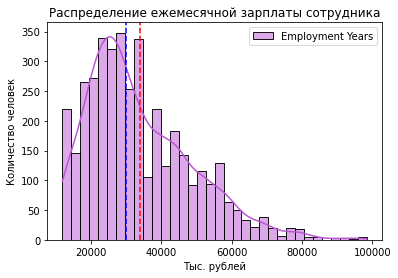

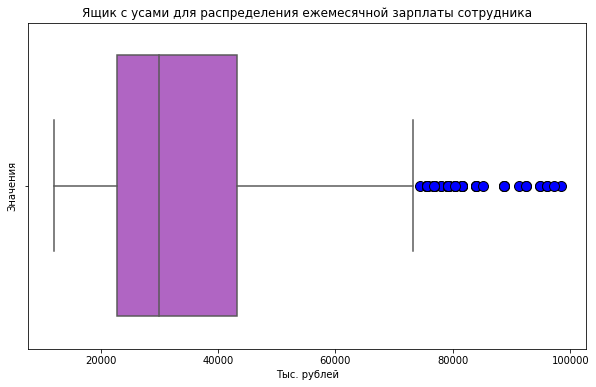

In [19]:
sns.histplot(
    data=train_job_satisfaction_rate,
    x='salary',
    kde=True,
    color='#BA55D3',
    label='Employment Years'
)

plt.title('Распределение ежемесячной зарплаты сотрудника')
plt.xlabel('Тыс. рублей')
plt.ylabel('Количество человек')
plt.legend()

plt.axvline(x=train_job_satisfaction_rate['salary'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=train_job_satisfaction_rate['salary'].median(), color='blue', linestyle='--', label='Median Value')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='salary', 
            data=train_job_satisfaction_rate, 
            ax=ax, 
            palette=['#BA55D3'],
            flierprops={'marker': 
                        'o', 
                        'markersize': 10, 
                        'markerfacecolor': 'blue', 
                        'markeredgecolor': 'black'})
plt.title('Ящик с усами для распределения ежемесячной зарплаты сотрудника')
plt.xlabel('Тыс. рублей')
plt.ylabel('Значения')
plt.show()

Распределение ежемесячной зарплаты сотрудника варьируется от 12000 до 98000, чаще всего сотрудники получают примерно от 15000 до 35000, очень мало работников, которые получают больше 60000 рублей, но значение выглядят реальными, удалять их не нужно, распределение ассиметричное вправо

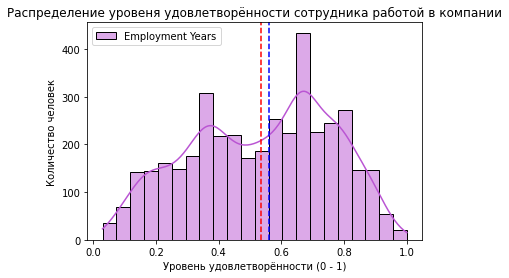

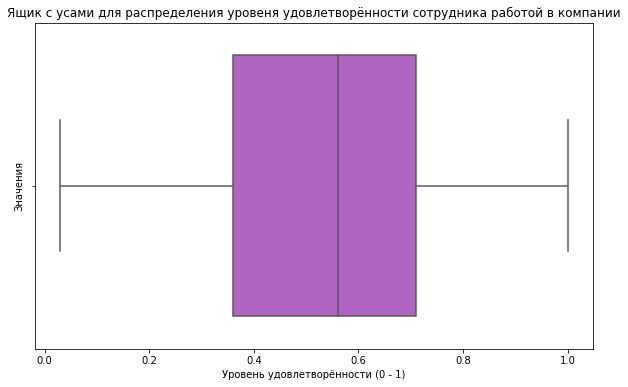

In [20]:
sns.histplot(
    data=train_job_satisfaction_rate,
    x='job_satisfaction_rate',
    kde=True,
    color='#BA55D3',
    label='Employment Years'
)

plt.title('Распределение уровеня удовлетворённости сотрудника работой в компании')
plt.xlabel('Уровень удовлетворённости (0 - 1)')
plt.ylabel('Количество человек')
plt.legend()

plt.axvline(x=train_job_satisfaction_rate['job_satisfaction_rate'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=train_job_satisfaction_rate['job_satisfaction_rate'].median(), color='blue', linestyle='--', label='Median Value')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='job_satisfaction_rate', 
            data=train_job_satisfaction_rate, 
            ax=ax, 
            palette=['#BA55D3'],
            flierprops={'marker': 
                        'o', 
                        'markersize': 10, 
                        'markerfacecolor': 'blue', 
                        'markeredgecolor': 'black'})
plt.title('Ящик с усами для распределения уровеня удовлетворённости сотрудника работой в компании')
plt.xlabel('Уровень удовлетворённости (0 - 1)')
plt.ylabel('Значения')
plt.show()

    Распределение уровеня удовлетворённости сотрудника работой в компании варьируется от 0 до 1, чаще всего 
    сотрудники удовлетворены на ~0.6-0.7, распределение нормальное

### Входные признаки тестовой выборки

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Здорово, что сравниваешь выборки!</font>

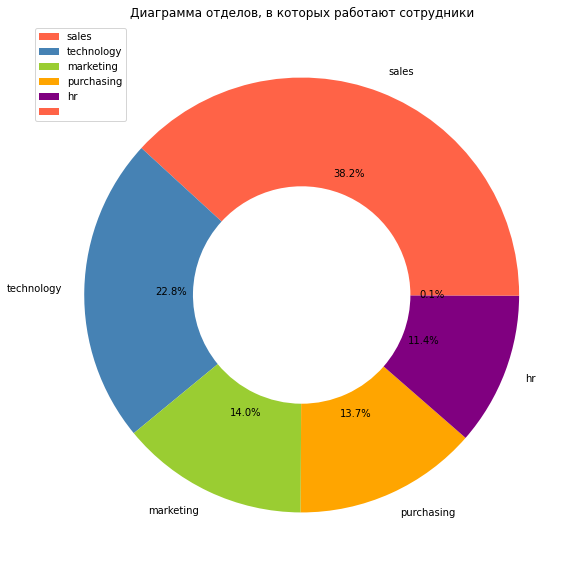

In [21]:
test_features['dept'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма отделов, в которых работают сотрудники',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32', '#FFA500', '#800080']);

plt.legend()
plt.show()

Больше всего людей работает в продажах(32.2%), меньше всего в сфере управления персоналом(12.7%)

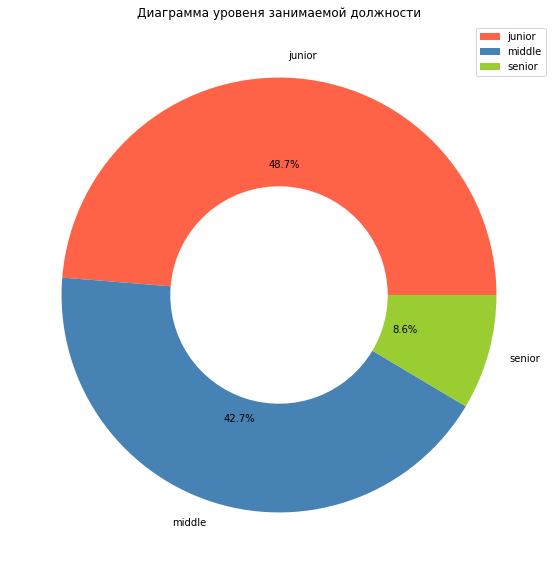

In [22]:
test_features['level'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма уровеня занимаемой должности',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32']);

plt.legend()
plt.show()

Больше всего джуниоров(50.1%) и мидлов(38.6%) меньше всего сеньоров(11.3%)

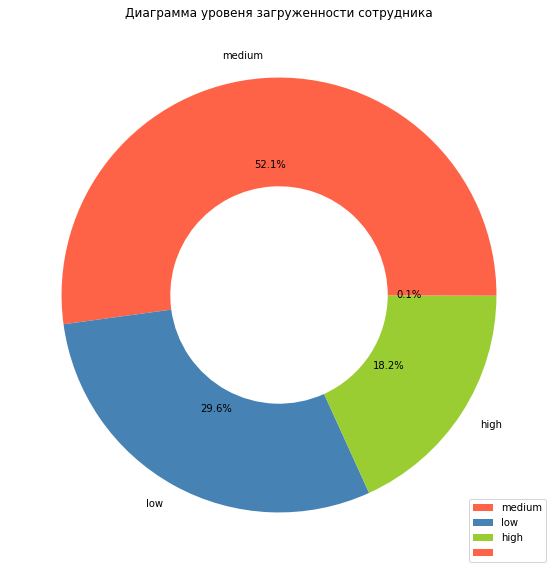

In [23]:
test_features['workload'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма уровеня загруженности сотрудника',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32']);

plt.legend()
plt.show()

Чаще всего у сотрудников средняя загруженность на работе(48.5%), меньше всего высокая(22.6%)

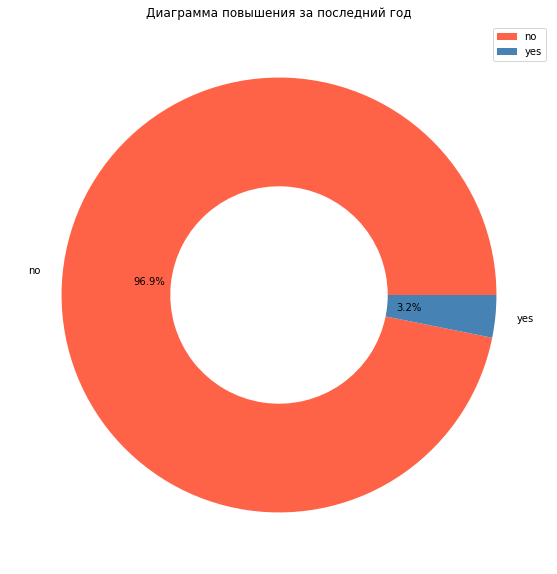

In [24]:
test_features['last_year_promo'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма повышения за последний год',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4']);

plt.legend()
plt.show()

В компании очень мало повышений за последний год, всего 4.3% сотрудников повысились

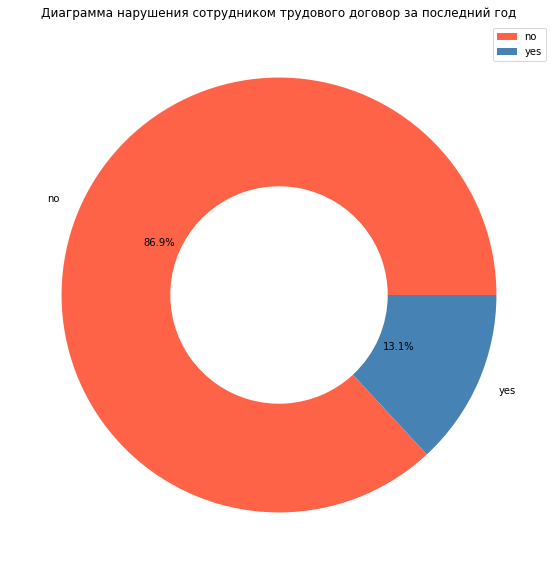

In [25]:
test_features['last_year_violations'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма нарушения сотрудником трудового договор за последний год',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4']);

plt.legend()
plt.show()

Сотрудники редко нарушают условия договора, 83.3% не нарушали

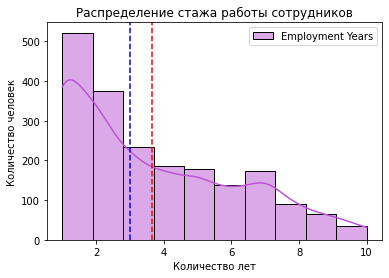

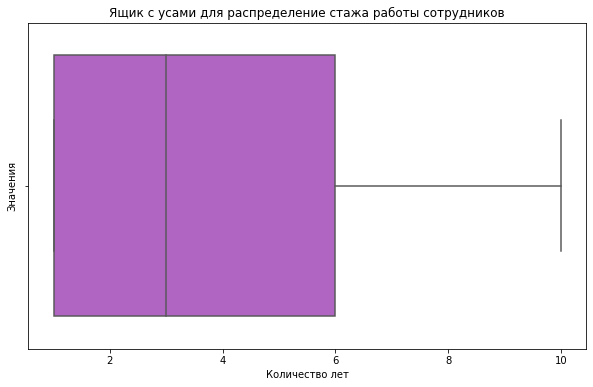

In [26]:
sns.histplot(
    data=test_features,
    x='employment_years',
    kde=True,
    color='#BA55D3',
    bins=10,
    label='Employment Years'
)

plt.title('Распределение стажа работы сотрудников')
plt.xlabel('Количество лет')
plt.ylabel('Количество человек')
plt.legend()

plt.axvline(x=test_features['employment_years'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=test_features['employment_years'].median(), color='blue', linestyle='--', label='Median Value')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='employment_years', 
            data=test_features, 
            ax=ax, 
            palette=['#BA55D3'],
            flierprops={'marker': 
                        'o', 
                        'markersize': 10, 
                        'markerfacecolor': 'blue', 
                        'markeredgecolor': 'black'})
plt.title('Ящик с усами для распределение стажа работы сотрудников')
plt.xlabel('Количество лет')
plt.ylabel('Значения')
plt.show()

Распределение длительности работы в компании (в годах) варьируется от 1 до 10, больше всего в компании сотрудников, которые работают первый год или два, распределение ассиметричное вправо

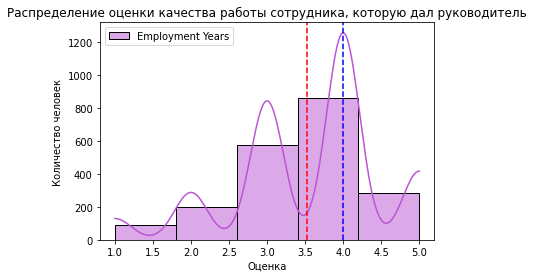

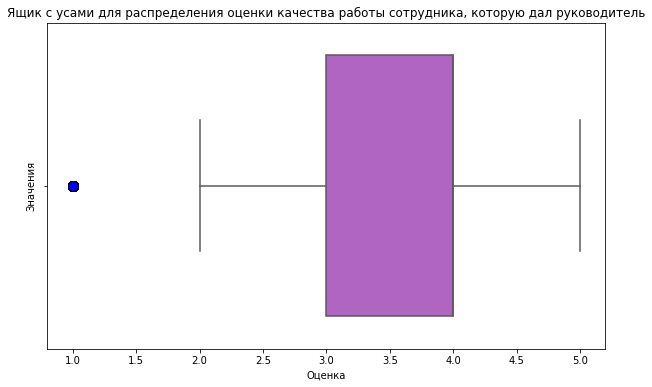

In [27]:
sns.histplot(
    data=test_features,
    x='supervisor_evaluation',
    kde=True,
    color='#BA55D3',
    bins=5,
    label='Employment Years'
)

plt.title('Распределение оценки качества работы сотрудника, которую дал руководитель')
plt.xlabel('Оценка')
plt.ylabel('Количество человек')
plt.legend()

plt.axvline(x=test_features['supervisor_evaluation'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=test_features['supervisor_evaluation'].median(), color='blue', linestyle='--', label='Median Value')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='supervisor_evaluation', 
            data=test_features, 
            ax=ax, 
            palette=['#BA55D3'],
            flierprops={'marker': 
                        'o', 
                        'markersize': 10, 
                        'markerfacecolor': 'blue', 
                        'markeredgecolor': 'black'})
plt.title('Ящик с усами для распределения оценки качества работы сотрудника, которую дал руководитель')
plt.xlabel('Оценка')
plt.ylabel('Значения')
plt.show()

Распределение оценки качества работы сотрудника, которую дал руководитель варьируется от 1 до 5, чаще всего сотрудников оценивают на 3-4, распределение ассиметричное влево

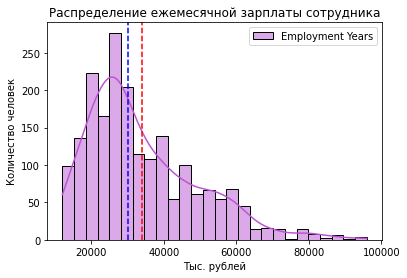

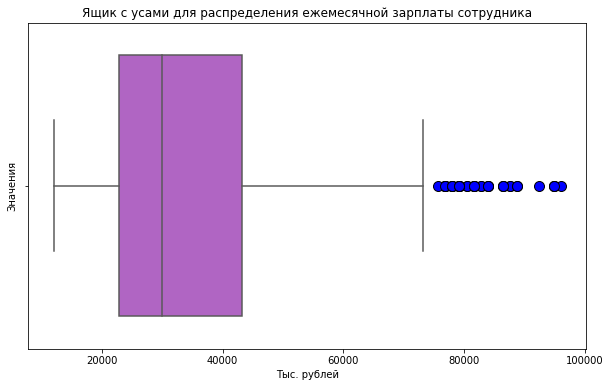

In [28]:
sns.histplot(
    data=test_features,
    x='salary',
    kde=True,
    color='#BA55D3',
    label='Employment Years'
)

plt.title('Распределение ежемесячной зарплаты сотрудника')
plt.xlabel('Тыс. рублей')
plt.ylabel('Количество человек')
plt.legend()

plt.axvline(x=test_features['salary'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=test_features['salary'].median(), color='blue', linestyle='--', label='Median Value')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='salary', 
            data=test_features, 
            ax=ax, 
            palette=['#BA55D3'],
            flierprops={'marker': 
                        'o', 
                        'markersize': 10, 
                        'markerfacecolor': 'blue', 
                        'markeredgecolor': 'black'})
plt.title('Ящик с усами для распределения ежемесячной зарплаты сотрудника')
plt.xlabel('Тыс. рублей')
plt.ylabel('Значения')
plt.show()

Распределение ежемесячной зарплаты сотрудника варьируется от 12000 до 98000, чаще всего сотрудники получают примерно от 15000 до 35000, распределение ассиметричное вправо

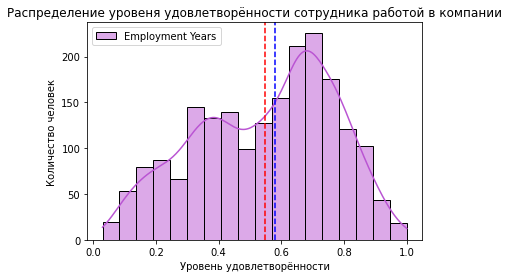

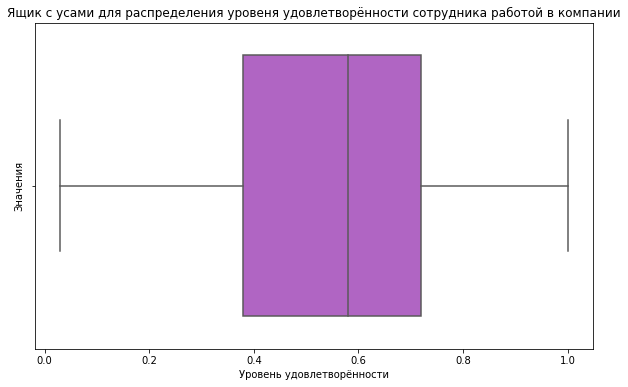

In [29]:
sns.histplot(
    data=test_target_job_satisfaction_rate,
    x='job_satisfaction_rate',
    kde=True,
    color='#BA55D3',
    label='Employment Years'
)

plt.title('Распределение уровеня удовлетворённости сотрудника работой в компании')
plt.xlabel('Уровень удовлетворённости')
plt.ylabel('Количество человек')
plt.legend()

plt.axvline(x=test_target_job_satisfaction_rate['job_satisfaction_rate'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=test_target_job_satisfaction_rate['job_satisfaction_rate'].median(), color='blue', linestyle='--', label='Median Value')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='job_satisfaction_rate', 
            data=test_target_job_satisfaction_rate, 
            ax=ax, 
            palette=['#BA55D3'],
            flierprops={'marker': 
                        'o', 
                        'markersize': 10, 
                        'markerfacecolor': 'blue', 
                        'markeredgecolor': 'black'})
plt.title('Ящик с усами для распределения уровеня удовлетворённости сотрудника работой в компании')
plt.xlabel('Уровень удовлетворённости')
plt.ylabel('Значения')
plt.show()

Распределение уровеня удовлетворённости сотрудника работой в компании варьируется от 0 до 1, чаще всего 
сотрудники удовлетворены на ~0.6-0.7, распределение нормальное

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Хорошая работа в части исследования данных: молодец, что используешь функции, а также применяешь подходящие для типов данных инструменты.</font>

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


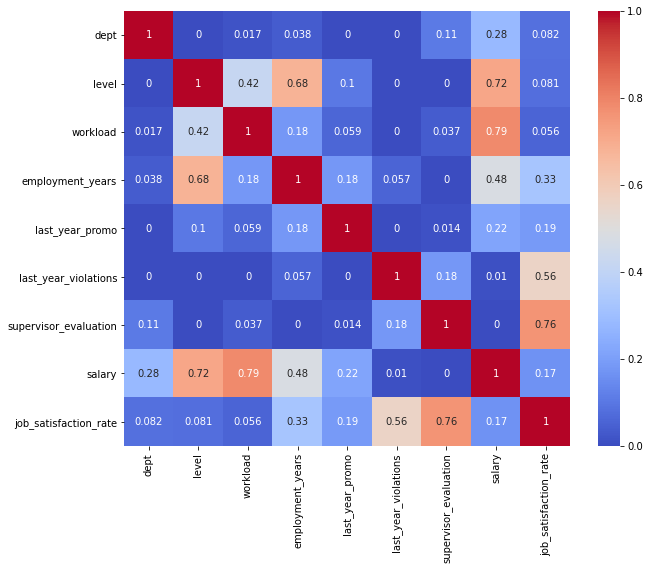

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix(train_job_satisfaction_rate[[
    'dept', 
    'level', 
    'workload', 
    'employment_years', 
    'last_year_promo',
    'last_year_violations',
    'supervisor_evaluation',
    'salary',
    'job_satisfaction_rate',
]]), annot=True, cmap='coolwarm')
plt.show()

Значение 0.76 указывает на высокую положительную корреляцию с целевым признаком, удалять ее не буду, так как признак supervisor_evaluation содержит уникальную информацию, если модель обучить не получится, вернусь сюда

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Здорово,что применена `phik` для анализа и нелинейных зависимостей</font>

## Подготовка данных

In [31]:
test_df = test_target_job_satisfaction_rate.merge(test_features, on='id', how='left')
display(test_df.sample(10))

,id,job_satisfaction_rate,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1822,222419,0.72,technology,senior,medium,5,no,no,4,73200
753,892656,0.20,sales,middle,low,4,no,no,3,22800
1266,126354,0.39,sales,middle,low,5,no,no,1,22800
1636,175043,0.82,sales,middle,high,6,no,no,4,57600
366,302947,0.57,marketing,middle,low,6,no,no,3,25200
1351,289723,0.10,technology,junior,low,1,no,no,3,15600
566,220848,0.87,sales,senior,high,10,no,no,4,78000
375,907985,0.30,purchasing,middle,high,8,no,no,2,46800
779,445276,0.37,technology,junior,low,1,no,no,3,22800
124,294319,0.16,marketing,middle,medium,4,yes,yes,1,39600


In [32]:
X_train = train_job_satisfaction_rate.drop(['job_satisfaction_rate', 'id'], axis=1)
y_train = train_job_satisfaction_rate['job_satisfaction_rate']

X_test = test_df.drop(['job_satisfaction_rate', 'id'], axis=1)
y_test = test_df['job_satisfaction_rate']

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Так как мы удалили признак "id" с неповторяющимися значениями, у нас могут появиться новые явные дубликаты: чем меньше признаков остаётся, тем выше шанс, что значения остальных признаков будут пересекаться. При этом ценности для модели такие наблюдения уже не принесут, поэтому стоит проверить дубликаты также в финальной версии обучающей таблицы.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Тестовые данные нам выданы отдельным файлом test_features.csv.\
Нужно использовать их для тестирование лучшей модели, выбранной по результатам кросс-валидации.~~</font>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Исправил
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 8), (2000, 8), (4000,), (2000,))

In [34]:
ohe_columns = ['dept',
               'last_year_promo', 
               'last_year_violations']

ord_columns = ['level',
               'workload']

num_columns = ['employment_years',
               'supervisor_evaluation',
               'salary']

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Отлично, что разделяешь категории на порядковые и номинальные.</font>

In [35]:
# SimpleImputer + OHE

ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Обрати внимание, поскольку нужно обработать новую категорию (`' '`, да и любую другую, в новых данных может появиться всё что угодно), значение параметра handle_unknown в  должно быть OneHotEncoder `"ignore"`.~~</font>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Исправил
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [36]:
# SimpleImputer + OE

ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('oe', OrdinalEncoder(
            categories=[
                ['junior', 'middle', 'senior'],
                ['low', 'medium', 'high']
            ],
            handle_unknown='use_encoded_value', unknown_value=np.nan
        )),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Здорово, что есть обработка неизвестых категорий (можно не удалять `'_'` вручную из тестовых данных.)</font>

In [37]:
# общий пайплайн для подготовки данных

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [38]:
# итоговый пайплайн: подготовка данных и модель

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
)

In [39]:
param_grid = [
    {
        'models': [LinearRegression()],
        'models__fit_intercept': [True, False],
        'models__copy_X': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(36, 45),
        'models__min_samples_leaf': range(2, 10),
        'models__min_samples_split': range(6, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [40]:
def smape(y_true, y_pred) -> float:
    return 100/len(y_true) * np.sum(2*np.abs(y_pred-y_true)/(np.abs(y_true)+np.abs(y_pred)))
   
smape_score_ = make_scorer(score_func=smape, greater_is_better=False)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `smape` расчитана верно.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️ <br>
<font color='green'>Верно, что не забываешь указать greater_is_better=False, Это пригодится для SearchCV. SMAPE — ошибка, её минимизируем.</font>

## Обучение моделей

In [42]:
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=smape_score_,
    n_jobs=-1,
    verbose=3
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1956 candidates, totalling 9780 fits
[CV 1/5] END models=LinearRegression(), models__copy_X=True, models__fit_intercept=True, preprocessor__num=StandardScaler();, score=-25.197 total time=   0.0s
[CV 2/5] END models=LinearRegression(), models__copy_X=True, models__fit_intercept=True, preprocessor__num=StandardScaler();, score=-25.765 total time=   0.2s
[CV 3/5] END models=LinearRegression(), models__copy_X=True, models__fit_intercept=True, preprocessor__num=StandardScaler();, score=-25.765 total time=   0.1s
[CV 4/5] END models=LinearRegression(), models__copy_X=True, models__fit_intercept=True, preprocessor__num=StandardScaler();, score=-25.205 total time=   0.2s
[CV 5/5] END models=LinearRegression(), models__copy_X=True, models__fit_intercept=True, preprocessor__num=StandardScaler();, score=-23.211 total time=   0.1s
[CV 1/5] END models=LinearRegression(), models__copy_X=True, models__fit_intercept=True, preprocessor__num=MinMaxScaler();, score=-25.197 to

KeyboardInterrupt: 

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

In [ ]:
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)

In [ ]:
best_model = grid_search.best_estimator_
print(f'Метрика smape лучшей модели тренировочных данных: {round(grid_search.best_score_*(-1), 3)}')

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Нужно вывести результаты оценки Топ-10 лучших моделей, для анализа.~~</font>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Написал
</div>

In [ ]:
top_models = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head(10)
print('\nТоп 10 лучших моделей:')
display(top_models[['params', 'mean_test_score']])

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Нужно показать все параметры в поле `params` для анализа.</font>
```python
# Установка опции для отображения максимальной ширины столбца
pd.set_option('display.max_colwidth', None)
```

In [ ]:
print(f'Метрика smape лучшей модели на тестовых данных: {round(smape(y_test, best_model.predict(X_test)), 3)}')

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> ~~Здесь нужны данные из  test_features.csv, test_target_job_satisfaction_rate.csv. ~~</span>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Исправил
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

Лучшей моделью оказалась DecisionTreeRegressor с параметрами max_depth=36, min_samples_leaf=3,min_samples_split=6, random_state=42, с метрикой smape на тестовой выборке равной 13.578, а это значит, что модель успешно обучилась

In [ ]:
X_estim = grid_search.best_estimator_['preprocessor'].fit_transform(X_train)

best_model_fit = grid_search.best_estimator_['models'].fit(X_estim, y_train)
explainer_1 = shap.ExactExplainer(best_model_fit, X_estim)

feature_names_1 = grid_search.best_estimator_[:-1].get_feature_names_out()

shap.summary_plot(X_estim, plot_type='bar', feature_names=feature_names_1)

Признаки, которые сильнее всего влияют на целевой признак:

    -workload	
    -employment_years	    
    -supervisor_evaluation
    -salary
    -level

Признаки, которые мало значимы для целевого признака:

    -dept
    -last_year_promo

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Промежуточные выводы 

Во время задачи 1: предсказание уровня удовлетворённости сотрудника, данные были обработаны: пропуски заполнены в пайплайне, исправлены опечатки, также был проведен анализ датасетов, выбросы не найдены. По итогам можно сделать следующие выводы:

    -Для поиска лучшей модели был написан пайплайн, с перебором 2 моделей с раличными гиперпараметрами -                           DecisionTreeRegressor, LinearRegression()
    
    -Лучшая модель - DecisionTreeRegressor с параметрами max_depth=36, min_samples_leaf=3, min_samples_split=6, random_state=42
    
    -Метрика smape на тестовой выборке - 13.578

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Задача 2: предсказание увольнения сотрудника из компании

## Загрузка и описание данных

In [ ]:
train_quit = read_file('/datasets/train_quit.csv', 'https://code.s3.yandex.net/datasets/train_quit.csv', '')
# test_features = read_file('/datasets/test_features.csv', 'https://code.s3.yandex.net/datasets/test_features.csv', '')
test_target_quit = read_file('/datasets/test_target_quit.csv', 'https://code.s3.yandex.net/datasets/test_target_quit.csv', '')

In [ ]:
df_info(train_quit)
df_info(test_features)
df_info(test_target_quit)

In [ ]:
df_nan(train_quit)
df_nan(test_features)
df_nan(test_target_quit)

In [ ]:
df_describe(train_quit)
df_describe(test_features)
df_describe(test_target_quit)

In [ ]:
df_duplicated(train_quit)
df_duplicated(test_features)
df_duplicated(test_target_quit)

***train_quit.csv*** - таблица, которая содержит тренировочные данные для обучения модели.
    
    dept — отдел, в котором работает сотрудник.
    
    level — уровень занимаемой должности.
    
    workload — уровень загруженности сотрудника.
    
    employment_years — длительность работы в компании (в годах).
    
    last_year_promo — показывает, было ли повышение за последний год.
    
    last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год.
    
    supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель.
    
    salary — ежемесячная зарплата сотрудника.
    
    quit — увольнение сотрудника из компании.
    

***test_features.csv*** - таблица, которая содержит входные признаки тестовой выборки, данные в таблице такие же, кроме
quit

***test_target_quit.csv*** - таблица, которая содержит целевой признак тестовой выборки, в ней находится 
quit

## Предобработка данных

In [ ]:
train_quit['level'] = train_quit['level'].replace('sinior', 'senior')
# test_features['level'] = test_features['level'].replace('sinior', 'senior')

In [ ]:
train_quit = train_quit.drop_duplicates()

Пропуски будут заполнены в пайплайне, дубликаты удалены, исправлены опечатки

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> ~~Вывод~~</span>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Исправил
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

## Исследовательский анализ

### Тренировочные данные

In [ ]:
train_quit['dept'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма отделов, в которых работают сотрудники',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32', '#FFA500', '#800080']);

plt.legend()
plt.show()

Больше всего людей работает в продажах(35.9%), меньше всего в сфере управления персоналом(11.6%)

In [ ]:
train_quit['level'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма уровеня занимаемой должности',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32']);

plt.legend()
plt.show()

Больше всего джуниоров(48.7%) и мидлов(42.4%) меньше всего сеньоров(8.9%)

In [ ]:
train_quit['workload'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма уровеня загруженности сотрудника',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32']);

plt.legend()
plt.show()

Чаще всего у сотрудников средняя загруженность на работе(53.0%), меньше всего высокая(16.9%)

In [ ]:
train_quit['last_year_promo'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма повышения за последний год',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32', '#FFA500', '#800080']);

plt.legend()
plt.show()

В компании очень мало повышений за последний год, всего 2.8% сотрудников повысились

In [ ]:
train_quit['last_year_violations'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма нарушения сотрудником трудового договор за последний год',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4']);

plt.legend()
plt.show()

Сотрудники редко нарушают условия договора, 86.4% не нарушали

In [ ]:
sns.histplot(
    data=train_quit,
    x='employment_years',
    kde=True,
    color='#BA55D3',
    bins=10,
    label='Employment Years'
)

plt.title('Распределение стажа работы сотрудников')
plt.xlabel('Количество лет')
plt.ylabel('Количество человек')
plt.legend()

plt.axvline(x=train_quit['employment_years'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=train_quit['employment_years'].median(), color='blue', linestyle='--', label='Median Value')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='employment_years', 
            data=train_quit, 
            ax=ax, 
            palette=['#BA55D3'],
            flierprops={'marker': 
                        'o', 
                        'markersize': 10, 
                        'markerfacecolor': 'blue', 
                        'markeredgecolor': 'black'})
plt.title('Ящик с усами для распределение стажа работы сотрудников')
plt.xlabel('Количество лет')
plt.ylabel('Значения')
plt.show()

Распределение длительности работы в компании (в годах) варьируется от 1 до 10, больше всего в компании сотрудников, которые работают первый год или два, распределение ассиметричное вправо

In [ ]:
sns.histplot(
    data=train_quit,
    x='supervisor_evaluation',
    kde=True,
    color='#BA55D3',
    bins=5,
    label='Employment Years'
)

plt.title('Распределение оценки качества работы сотрудника, которую дал руководитель')
plt.xlabel('Оценка')
plt.ylabel('Количество человек')
plt.legend()

plt.axvline(x=train_quit['supervisor_evaluation'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=train_quit['supervisor_evaluation'].median(), color='blue', linestyle='--', label='Median Value')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='supervisor_evaluation', 
            data=train_quit, 
            ax=ax, 
            palette=['#BA55D3'],
            flierprops={'marker': 
                        'o', 
                        'markersize': 10, 
                        'markerfacecolor': 'blue', 
                        'markeredgecolor': 'black'})
plt.title('Ящик с усами для распределения оценки качества работы сотрудника, которую дал руководитель')
plt.xlabel('Оценка')
plt.ylabel('Значения')
plt.show()

Распределение оценки качества работы сотрудника, которую дал руководитель варьируется от 1 до 5, чаще всего сотрудников оценивают на 3-4, распределение ассиметричное влево

In [ ]:
sns.histplot(
    data=train_quit,
    x='salary',
    kde=True,
    color='#BA55D3',
    label='Employment Years'
)

plt.title('Распределение ежемесячной зарплаты сотрудника')
plt.xlabel('Тыс. рублей')
plt.ylabel('Количество человек')
plt.legend()

plt.axvline(x=train_quit['salary'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=train_quit['salary'].median(), color='blue', linestyle='--', label='Median Value')

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='salary', 
            data=train_quit, 
            ax=ax, 
            palette=['#BA55D3'],
            flierprops={'marker': 
                        'o', 
                        'markersize': 10, 
                        'markerfacecolor': 'blue', 
                        'markeredgecolor': 'black'})
plt.title('Ящик с усами для распределения ежемесячной зарплаты сотрудника')
plt.xlabel('Тыс. рублей')
plt.ylabel('Значения')
plt.show()

Распределение ежемесячной зарплаты сотрудника варьируется от 12000 до 98000, чаще всего сотрудники получают примерно от 15000 до 35000, распределение ассиметричное вправо

### Целевой признак тестовой выборки

In [ ]:
test_target_quit['quit'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма увольнения сотрудника из компании',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4']);

plt.legend()
plt.show()

Большинство сотрудников продолжают работу в компании - 71.8%

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> Вывод.</span>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Исправил
</div>

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix(train_quit[[
    'dept', 
    'level', 
    'workload', 
    'employment_years', 
    'last_year_promo',
    'last_year_violations',
    'supervisor_evaluation',
    'salary',
    'quit',
]]), annot=True, cmap='coolwarm')
plt.show()

Мультиколлинеарности не наблюдается, удалять ничего не нужно

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

### Портрет «уволившегося сотрудника»

In [ ]:
train_quit.loc[train_quit['quit'] == 'yes', 'dept'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма отделов, в которых работают сотрудники',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32', '#FFA500', '#800080']);

plt.legend()
plt.show()

dept_quit_proportion = train_quit.groupby(['dept'])['quit'].value_counts(normalize=True)
print(dept_quit_proportion)

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Распределение категорий в данных неравномерное, поэтому нужно нормализовать количество ушедших относительно исследуемого признака, Например из какого департамента уходят чаще, оносительно количества работающих в департаменте.\
Сделать это можно сгруппировав данные по признаку и посчитать долю таргета в каждом из значений (`.groupby(['dept'])['quit'].value_counts(normalize=True)`)</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ⚠️\
<span style="color: darkorange"> Срез по мультииндексу можно делать так: </span>
```python
df.loc[df.index.get_level_values(1) == 'yes']
```

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Не совсем понял, что нужно сделать, вывел данные с группировкой
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ⚠️\
<span style="color: darkorange"> Нужно вывести графики нормализованных значений.</span>

In [ ]:
train_quit.loc[train_quit['quit'] == 'yes', 'workload'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма уровеня загруженности сотрудника',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32']);

plt.legend()
plt.show()

In [ ]:
train_quit.loc[train_quit['quit'] == 'yes', 'level'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Диаграмма уровеня занимаемой должности',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#FF6347', '#4682B4', '#9ACD32']);

plt.legend()
plt.show()

In [ ]:
sns.histplot(
    data=train_quit.loc[train_quit['quit'] == 'yes'],
    x='salary',
    color='#BA55D3',
    bins=10,
    binrange=(10000, 51000),
    label='Employment Years'
)

plt.title('Распределение ежемесячной зарплаты сотрудника')
plt.xlabel('Тыс. рублей')
plt.ylabel('Количество человек')
plt.legend()

plt.show()

Исходя из данных можно сделать такой 'портрет':
    
    -Работал, скорее всего в продажах
    -Загруженность была низкая, возможно из-за этого работнику становилось скучно на работе или он не видел
    будущего на ней из-за отсутствия развития или же со средней загруженностью, но уволился, возможно, из-за низкой
    зарплаты
    -Занимал самую низкую должность
    -Оплата труда была низкая - до 30 тысяч рублей

### Визуализация удовлетворённости сотрудника работой в компании

In [ ]:
visual = test_target_quit.merge(test_target_job_satisfaction_rate, on='id', how='left')
display(visual.sample(10))

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> Объединять таблицы нужно по общему уникальному признаку, например `'id'` </span>

In [ ]:
sns.histplot(
    data=visual.loc[visual['quit'] == 'yes'],
    x='job_satisfaction_rate',
    color='#BA55D3', 
    bins=25,
    label='Уровень удовлетворенности'
)

plt.title('Распределение уровеня удовлетворённости уволенного сотрудника в компании')
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Количество человек')
plt.legend()

plt.show()

In [ ]:
sns.histplot(
    data=visual.loc[visual['quit'] == 'no'],
    x='job_satisfaction_rate',
    color='#BA55D3', 
    bins=25,
    label='Уровень удовлетворенности'
)

plt.title('Распределение уровеня удовлетворённости работающего сотрудника в компании')
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Количество человек')
plt.legend()

plt.show()

Можно сделать вывод, что у уволенных сотрудников уровень удовлетворенности был в среднем 0.2-0.4, а у работающих в среднем
он составляет 0.6-0.8

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> ~~На графиках, уровень удовлетворённости не отличается.~~ </span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ⚠️\
<span style="color: darkorange"> Поправь label.</span>


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Исправил
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

## Добавление нового входного признака

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> ~~`' '` - это задача Энкодеров!~~</span>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Исправил
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [ ]:
test_features['job_satisfaction_rate_pred'] = best_model.predict(test_features)
train_quit['job_satisfaction_rate_pred'] = best_model.predict(train_quit)

В датасеты test_features и train_quit был добавлен признак 'job_satisfaction_rate_pred', предсказанный лучшей моделью из первого задания

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Отлично, что добавляется предсказание предыдущей модели.</font>

## Подготовка данных

In [ ]:
test_df_sec = test_target_quit.merge(test_features, on='id', how='left')
display(test_df_sec.sample(10))

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [ ]:
train_quit.loc[train_quit['quit'] == 'no', 'quit'] = 0
train_quit.loc[train_quit['quit'] == 'yes', 'quit'] = 1
train_quit['quit'] = train_quit['quit'].astype(float)

In [ ]:
X_train = train_quit.drop(['quit', 'id'], axis=1)
y_train = train_quit['quit']

X_test = test_df_sec.drop(['quit', 'id'], axis=1)
y_test = test_df_sec['quit']

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red">~~train_test_split - не нужен.~~ </span>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Убрал
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
ohe_columns = ['dept',
               'last_year_promo', 
               'last_year_violations']

ord_columns = ['level',
               'workload']

num_columns = ['employment_years', 
               'supervisor_evaluation', 
               'salary',
               'job_satisfaction_rate_pred']

In [ ]:
# SimpleImputer + OHE

ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red">~~handle_unknown~~</span>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Исправил
</div>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [ ]:
# SimpleImputer + OE

ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('oe', OrdinalEncoder(
            categories=[
                ['junior', 'middle', 'senior'],
                ['low', 'medium', 'high']
            ],
            handle_unknown='use_encoded_value', unknown_value=np.nan
        )),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [ ]:
# общий пайплайн для подготовки данных

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [ ]:
# итоговый пайплайн: подготовка данных и модель

pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [ ]:
param_grid = [
#     {
#         'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
#         'models__max_depth': range(2, 15),
#         'models__max_features': range(2, 15),
#         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
#     },

#     {
#         'models': [KNeighborsClassifier()],
#         'models__n_neighbors': range(2, 10),
#         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
#     },

#     {
#         'models': [LogisticRegression(
#             random_state=RANDOM_STATE, 
#             solver='liblinear', 
#             penalty='l1'
#         )],
#         'models__C': range(1, 10),
#         'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
#     },

    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': range(1, 10),
        'models__degree': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

## Обучение модели

In [ ]:
grid_search = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=3
)
grid_search.fit(X_train, y_train)

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [ ]:
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_.round(3))

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Нужно вывести результаты оценки Топ-10 лучших моделей, для анализа.~~</font>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    Написал
</div>

In [ ]:
top_models = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head(10)
print('\nТоп 10 лучших моделей:')
display(top_models[['params', 'mean_test_score']])

In [ ]:
y_test_proba = grid_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_proba[:,1]).round(3)}')

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> ~~Здесь нужны данные из  test_features.csv, test_target_quit.csv.~~ </span>

Лучшей моделью оказалась SVC с параметрами C=1, degree=1, probability=True, random_state=42, с метрикой ROC-AUC на тестовой выборке равной 0.919, а это значит, что модель успешно обучилась

In [ ]:
X_estim = grid_search.best_estimator_['preprocessor'].fit_transform(X_train)

best_model_fit = grid_search.best_estimator_['models'].fit(X_estim, y_train)
explainer_1 = shap.ExactExplainer(best_model_fit, X_estim)

feature_names_1 = grid_search.best_estimator_[:-1].get_feature_names_out()

shap.summary_plot(X_estim, plot_type='bar', feature_names=feature_names_1)

Признаки, которые сильнее всего влияют на целевой признак:

    -workload           
    -supervisor_evaluation
    -salary
    -level
    -job_satisfaction_rate_pred
Признаки, которые мало значимы для целевого признака:

    -salary
    -dept
    -last_year_promo

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

## Промежуточные выводы

Во время задачи 2: предсказание уровня удовлетворённости сотрудника, данные были обработаны: пропуски заполнены в пайплайне, исправлены опечатки, также был проведен анализ датасетов, выбросы не найдены. По итогам можно сделать следующие выводы:

-Для поиска лучшей модели был написан пайплайн, с перебором 4 моделей с раличными гиперпараметрами -                           DecisionTreeClassifier, KNeighborsClassifier(), LogisticRegression(), SVC()

-Лучшая модель - SVC с параметрами C=1, degree=1, probability=True, random_state=42

-Метрика ROC-AUC на тестовой выборке - 0.919

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Общий вывод

У нас было две задачи: 
    
    Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
    Ваша вторая задача — построить модель, которая сможет на
    основе данных заказчика предсказать то, что сотрудник уволится из компании.
    
Чтобы решить эти задачи, были проделаны следующие этапы работы:

    -Загрузка, описание и изучение данных
    -Предобработка данных
    -Исследовательский анализ данных
    -Корреляционный анализ
    -Подготовка данных, написание пайплайна с пайплайном по предобработке
    -Обучение моделей, в задаче 1 была использована метрика smape, модель успешно обучилась и показала результат 
    14.789 на тестовых данных. В задаче 2 была использована метрика ROC-AUC, модель также успешно обучилась и 
    показала результат 0.919 на тестовой выборке

Предложения для бизнеса:

    Заняться мотивацией работников, особенно новых, которые работают до двух лет в компании, можно ввести корпоративное
    обучение, обозначить точнее, что нужно для карьерного роста, ввести дополнительные премии за заслуги или качественную 
    работу, отслеживать эффективность работы сотрудников и поощрять самых эффективных

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Женя, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Женя, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>